In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt



In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


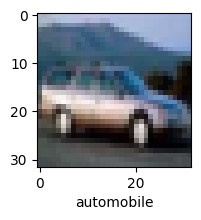

In [12]:
plot_sample(x_train, y_train,4)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
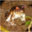

In [13]:
x_train[0]

In [14]:
# data normalization
x_train = x_train/255
x_test = x_test/255

In [15]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
   # CNN model
   cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=50, batch_size = 16)

Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9562 - loss: 0.1270
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9581 - loss: 0.1221
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9562 - loss: 0.1229
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9615 - loss: 0.1120
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9574 - loss: 0.1198
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9545 - loss: 0.1328
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9586 - loss: 0.1219
Epoch 8/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9633 - loss: 0.1054
Epoch 9/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9564 - loss: 0.1270
Epoch 10/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9619 - loss: 0.1089
Epoch 11/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9625 - loss: 0.1078
Epoch 12/50
3125/3125 ━━━━━

In [ ]:

y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.78      0.80      0.79      1000
           2       0.53      0.63      0.58      1000
           3       0.53      0.45      0.49      1000
           4       0.64      0.66      0.65      1000
           5       0.64      0.49      0.55      1000
           6       0.64      0.83      0.72      1000
           7       0.76      0.69      0.73      1000
           8       0.79      0.76      0.78      1000
           9       0.79      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4260 - accuracy: 0.6764


[1.4259974956512451, 0.6764000058174133]